<div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right,peru, peachpuff);overflow:hidden;"><b> Natural Language Processing / Wordcloud </b></div> 

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Problem Statement:</font></h3><br>
    
Develop an NLP model to classify text messages as either spam or ham (non-spam). Evaluate the performance of the model using three different classification algorithms: Decision Tree, Random Forest, and Naive Bayes. Additionally, generate a word cloud to visualize the most frequent words in the dataset, while identifying and removing stopwords.

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Problem Statement:</font></h3><br>
    
<b>Data Preprocessing:</b>
Clean and preprocess the text data by removing irrelevant characters, handling missing values, and converting text to lowercase.
Split the dataset into features (text messages) and labels (spam or ham).

<b>Exploratory Data Analysis (EDA):</b>
Analyze the distribution of spam and ham messages in the dataset.
Identify and visualize the most common words in the dataset using a word cloud.

<b>Stopword Removal:</b>
Identify and remove stopwords (commonly used words with little semantic value) from the text data.

<b>Feature Engineering:</b>
Convert the text data into a suitable format for machine learning model training. Consider techniques such as TF-IDF or word embeddings.

<b>Model Selection:</b>
Implement Decision Tree, Random Forest, and Naive Bayes algorithms for spam/ham classification.

<b>Model Training and Evaluation:</b>
Split the dataset into training and validation sets.
Train each selected algorithm on the training set and evaluate their performance on the validation set.
Measure accuracy, precision, recall, and F1-score for each algorithm.

<b>Word Cloud Visualization:</b>

Create a word cloud to visually represent the most frequent words in the dataset, excluding stopwords.

-------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>spam data</b>

In [ ]:
import pandas as pd
import string
import nltk     
from nltk.corpus import stopwords


In [ ]:
sp=pd.read_csv(r"C:\Users\nehaw\Desktop\Class Material\Python\DATA_FILES\spam1.csv", encoding='latin1')

In [ ]:
sp.head()

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Removing Nulls</b>

In [ ]:
sp1=sp.where((pd.notnull(sp)),'')

In [ ]:
sp1.head()

-----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Drop & Rename & Replace Columns</b>

In [ ]:
sp=sp1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
sp.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [ ]:
sp

In [ ]:
sp.y.replace({'ham':0,'spam':1},inplace=True)

In [17]:
sp

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
6771,1,this is the 2nd time we have tried 2 contact u...
6772,0,will ì_ b going to esplanade fr home?
6773,0,"pity, * was in mood for that. so...any other s..."
6774,0,the guy did some bitching but i acted like i'd...


------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Convert data into lower string
</b>

-----

In [18]:
sp.x=sp.x.str.lower()           ## because python is case sensitive language

In [19]:
sp.head(2)

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...


## Punctuations

In [20]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

-----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Measuring Execution time and reduce it</b>

-----

In [21]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [26]:
import timeit
start= timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

stop= timeit.default_timer()
execution_time=stop-start
print("program Executed in",execution_time)

program Executed in 0.5535490000038408


#### convert stopwords into list to decrease execution time

In [25]:
l1=list(stopwords.words("english"))

------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Before building the model we have to remove the stopwords</b>

------

In [27]:
def text_process(mess):  ## create a function
    
    """
    1.Remove the punctuations
    2.Remove the stopwords
    3.Return the list of clean textwors
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in l1]
    

In [28]:
# sp['x'].apply(text_process)               ## just for understanding

----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>WordCloud</b>

----

In [29]:
## Word cloud is a pictorial representation of most frequent words

In [30]:
from wordcloud import WordCloud

In [31]:
import matplotlib.pyplot as plt

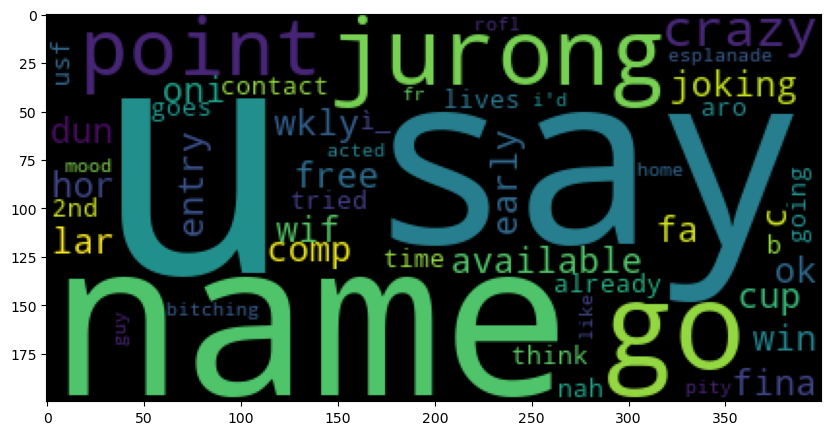

In [32]:
from wordcloud import WordCloud
cloud  = WordCloud(stopwords = stopwords.words("english"),max_words=50).generate(str(sp['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [33]:
# pip install WordCloud

-------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>tdm (Term document Matrix)</b>

----

In [34]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [35]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

In [36]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [37]:
len(bow_transformer.vocabulary_)

## there are 9422unique words(after removing punctuations and stopwords)
## that when we create our tdm , our tdm have 9422 this many columns

9422

In [38]:
tdm=bow_transformer.transform(sp["x"])

In [39]:
tdm.shape

(6776, 9422)

In [40]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [41]:
## tdm is like our x variables

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Sampling</b>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
tdm_train,tdm_test,train_y,test_y = train_test_split(tdm,sp["y"],test_size=.2)

----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>naive_bayes</b>

----

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [45]:
nb.fit(tdm_train,train_y)

MultinomialNB()

In [46]:
pred_nb=nb.predict(tdm_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[1137,   23],
       [   5,  191]], dtype=int64)

In [49]:
tab_nb.diagonal().sum()/tab_nb.sum()*100

97.93510324483776

------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>DecisionTreeClassifier</b>

-----

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
dtc.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [53]:
pred_test1=dtc.predict(tdm_test)
pred_train1=dtc.predict(tdm_train)

In [54]:
tab_dt=confusion_matrix(test_y,pred_test1)
tab_dt

array([[1153,    7],
       [  24,  172]], dtype=int64)

In [55]:
tab_dt.diagonal().sum()/tab_dt.sum()*100

97.71386430678466

---

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>LogisticRegression</b>

----

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression()
logreg.fit(tdm_train,train_y)

LogisticRegression()

In [58]:
pred_train =logreg.predict(tdm_train)
pred_test= logreg.predict(tdm_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
mat_test=confusion_matrix(test_y,pred_test)
mat_test

array([[1157,    3],
       [  14,  182]], dtype=int64)

In [61]:
mat_test.diagonal().sum()/mat_test.sum()*100

98.74631268436578

----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Random forest</b>

------

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')


In [63]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [64]:
pred_rfc= rfc.predict(tdm_test)

In [65]:
tab_rfc = confusion_matrix(pred_rfc,test_y)
tab_rfc

array([[1160,   26],
       [   0,  170]], dtype=int64)

In [68]:
tab_rfc.diagonal().sum()/tab_rfc.sum()*100

98.08259587020649

-----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fit;border-radius:5px;background: linear-gradient(to left,white, darksalmon);overflow:hidden; text-align:center;"><b>Final Accuracy</b>

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>

Random forest : 98.08%
    
LogisticRegression : 98.74%
        
Decision Tree : 97.71%
    
naive_bayes : 97.93%</font></h3><br>

---

---

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Conclusion:</font></h3><br>

Summarize the performance of Decision Tree, Random Forest, and Naive Bayes in classifying spam and ham messages. Identify the algorithm that performs best based on accuracy and other relevant metrics.
Present insights from the word cloud visualization, highlighting the most common words in the dataset.
Conclude by recommending the most effective algorithm for this spam/ham classification task and providing considerations for further improvements or exploration.